# Pandas Input Demo

This notebook describes how to read data into Pandas from various sources

## standard imports

In [4]:
import pandas as pd
%matplotlib inline

## read_csv()
Read CSV files. The delimiters and escaped characters can be tweaked as needed. There is a huge number of options for this function.

In [5]:
df_csv = pd.read_csv('../DATA/airport_boardings.csv', thousands=',', index_col=1)
print(df_csv.head())
print(df_csv.describe()))

SyntaxError: invalid syntax (<ipython-input-5-69a578314c27>, line 3)

## read_table()
Read text files (other than CSV). This function is very similar to *read_csv()* and shares most of its options. This is the best choice for tab-delimited, space-delimited, and other delimited flat file formats. 

In [ ]:
df_table = pd.read_table('../DATA/columns_of_numbers.txt', delim_whitespace=True)
# df_table.set_index = pd.date_range('1/1/2017', periods=len(df_table), freq='D')
df_table.head()

In [ ]:
df_table.plot(kind='scatter', x='Alpha', y='Zeta')

## read_sql(), read_sql_query(), read_sql_table()
Read data from a SQL database. It requires a connection object from one of the Python modules that follows the DB API, or it can use a SQLAlchemy DB engine object. A dataframe is created from the rows in the result set. 

TODO: describe read_sql_table  read_sql_query

### read_sql()
read_sql() is a convenience function that delegates to either *read_sql_query()* or *read_sql_table()*, as appropriate. 
It takes a query (or a table name) and the database connection. If a table is specified, the connection must be a SQLAlchemy engine. If a query is specified, it can be either a SQLAlchemy engine or a DB API connection object, as from pymssql, pyodbc, pymysql, cx_oracle, psycopg, etc. 

In [ ]:
import sqlite3
conn = sqlite3.connect('../DATA/presidents.db')
df_sql = pd.read_sql('select * from presidents', conn)
df_sql.head()

### read_sql_query()
read_sql_query() populates a dataframe from a SQL query. Either a DB API connection or a SQLAlchemy engine may be specified. 

In [ ]:
df_sql = pd.read_sql_query('select * from presidents', conn)
df_sql.head()

### read_sql_table()
read_sql_table() populates a dataframe with an entire SQL table. The connection must be a SQLAlchemy engine. 

In [ ]:
from sqlalchemy import create_engine
engine = create_engine('sqlite:///../DATA/presidents.db')
df_sql = pd.read_sql_table('presidents', engine)
df_sql.head()

## read_excel()
Read data from an Excel spreadsheet. The spreadsheet may be on the local computer, or specified via a URL. 

<!-- TODO: use different spreadsheet for local -->

### Local file

In [ ]:
df_excel_local = pd.read_excel('../DATA/presidents.xlsx')
df_excel_local.head()

### URL

In [ ]:
df_excel_url = pd.read_excel('http://qrc.depaul.edu/Excel_Files/Presidents.xls',
        na_values="NA()")
df_excel_url.head()

## read_html()
Read data from one or more tables in a Web page. It returns a list of DataFrames, even if there is only one table in the page. 

3
            Gainers & Losers   Price  Change % Change
0        DLTRDollar Tree Inc   88.53    5.21   +6.25%
1  NLSNNielsen Holdings P...   27.34    1.24   +4.75%
2   CXOConcho Resources I...  132.95    5.36   +4.20%
3           QCOMQualcomm Inc   58.96    2.31   +4.08%
4       NWLNewell Brands Inc   24.17    0.82   +3.51%
************************************************************
           Stock Sectors 3 Month % Change
0         Communications           +2.08%
1      Consumer Durables           -9.93%
2  Consumer Non-Durables           +2.88%
3    Commercial Services           -8.20%
4  Electronic Technology           -7.37%
************************************************************
   GILD    Gilead Sciences Inc.  Unnamed: 2
0   LVS   Las Vegas Sands Corp.         NaN
1  CELG     Celgene Corporation         NaN
2  AAPL              Apple Inc.         NaN
3   TXN  Texas Instruments Inc.         NaN
4    UA      Under Armour, Inc.         NaN
************************************

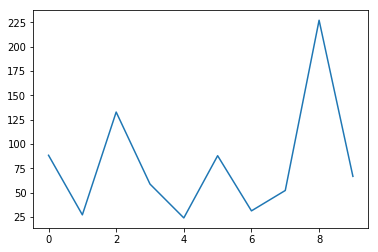

In [6]:
df_list = pd.read_html('http://money.cnn.com/data/us_markets/', header=0)
print(len(df_list))
for df in df_list:
    print(df.head())
    print('*' * 60)
    
gain_lose = df_list[0]
print(gain_lose.loc[:,['Gainers & Losers', 'Price']])
gain_lose['Price'].plot()

## read_fwf()
This function reads files with fixed-width fields. If the fields you want are contiguous, specify the widths of all columns with the *widths* parameter. If they are non-contiguous (you just want to pull out certain columns), specify the columns with the *colspecs* parameter, which takes a list of tuples describing the beginning and end end of each desired column. If neither *widths* or *colspecs* is given, *read_fwf()* tries to infer the columns. 

In [7]:
df_fwf = pd.read_fwf('../DATA/world_median_ages.txt', 
    names=['country', 'median_age'], widths=[7,50,4], index_col=0)
print(df_fwf.head())
print(df_fwf.iloc[1])

                     country  median_age
1                     Monaco        52.0
2                      Japan        46.0
3                    Germany        46.0
4  Saint Pierre and Miquelon        45.0
5             Virgin Islands        45.0
country       Japan
median_age       46
Name: 2, dtype: object


<class 'matplotlib.axes._subplots.AxesSubplot'>


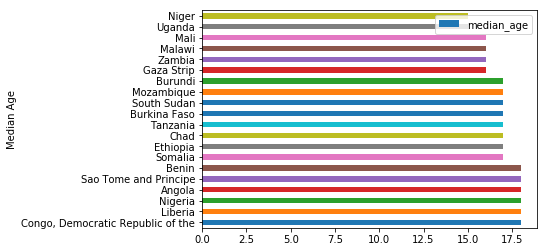

In [8]:
ax = df_fwf.iloc[-20:].plot(kind='barh', x='country', y='median_age')
print(type(ax))
ax.set_ylabel('Median Age')
